# Solar Evolution

Figure 6.3 from Chapter 6 of *Stellar Structure & Evolution* Pinsonneault & Ryden, Cambridge 
University Press.

Luminosity and surface area of a standard solar model as a function of time. Values are normalized to the 
nominal solar values at the present day ($t = 4.57 {\rm\,Gyr}$. Data are from the BP04 solar model. 

In [1]:
%matplotlib inline

import os, sys, math
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator, LogLocator, NullFormatter

import warnings
warnings.filterwarnings('ignore',category=UserWarning, append=True)

## Standard Plot Format

Setup the standard plotting format and make the plot.

In [2]:
plotFile = 'Fig6_3.png' 

# graphic aspect ratio = width/height

aspect = 4.0/3.0

#
# Don't change these unless you really need to (we never have)
#
# fPage is the horizontal fraction of the page occupied by the figure, default 1.0
#
# scaleFac is the LaTeX includegraphics scaling in units of \textwidth, default 1.0
#

fPage = 1.0
scaleFac = 0.85

# Text width in inches - don't change, this is defined by the print layout

textWidth = 6.0 # inches

# Graphic dimensions depending on bitmap or vector format (draft vs production)

dpi = 600
plotWidth = dpi*fPage*textWidth
plotHeight = plotWidth/aspect
axisFontSize = 12
labelFontSize = 8
lwidth = 0.5
axisPad = 5
wInches = fPage*textWidth # float(plotWidth)/float(dpi)
hInches = wInches/aspect  # float(plotHeight)/float(dpi)
    
# LaTeX is used throughout for markup of symbols, Times-Roman serif font

plt.rc('text', usetex=True)
plt.rc('font', **{'family':'serif','serif':['Times-Roman'],'weight':'bold','size':'16'})

# Font and line weight defaults for axes

matplotlib.rc('axes',linewidth=lwidth)
matplotlib.rcParams.update({'font.size':axisFontSize})

# axis and label padding

plt.rcParams['xtick.major.pad']=f'{axisPad}'
plt.rcParams['ytick.major.pad']=f'{axisPad}'
plt.rcParams['axes.labelpad'] = f'{axisPad}'

## Model Data

Data file has a header.  Data we want are t, L, and Rsquared.  t is in Gyr, L and R are in nominal solar units.
The file is in the `ModelSun/` folder.

Age of the sun is t<sub>Sun</sub>=4.57 Gyr.

In [3]:
dataFile = 'ModelSun/BP2004_Evolution.txt'

data = pd.read_csv(dataFile,sep=r'\s+',comment='#')
tGyr = np.array(data['t'])
Lsun = np.array(data['L'])
R2sun = np.array(data['Rsquared'])

tSun = 4.57 # Gyr

tMin = 0
tMax = 8
yMin = 0.6
yMax = 1.4

### Figure 6.3

Make the plot, linear axes in solar radius, and L + R$^2$.

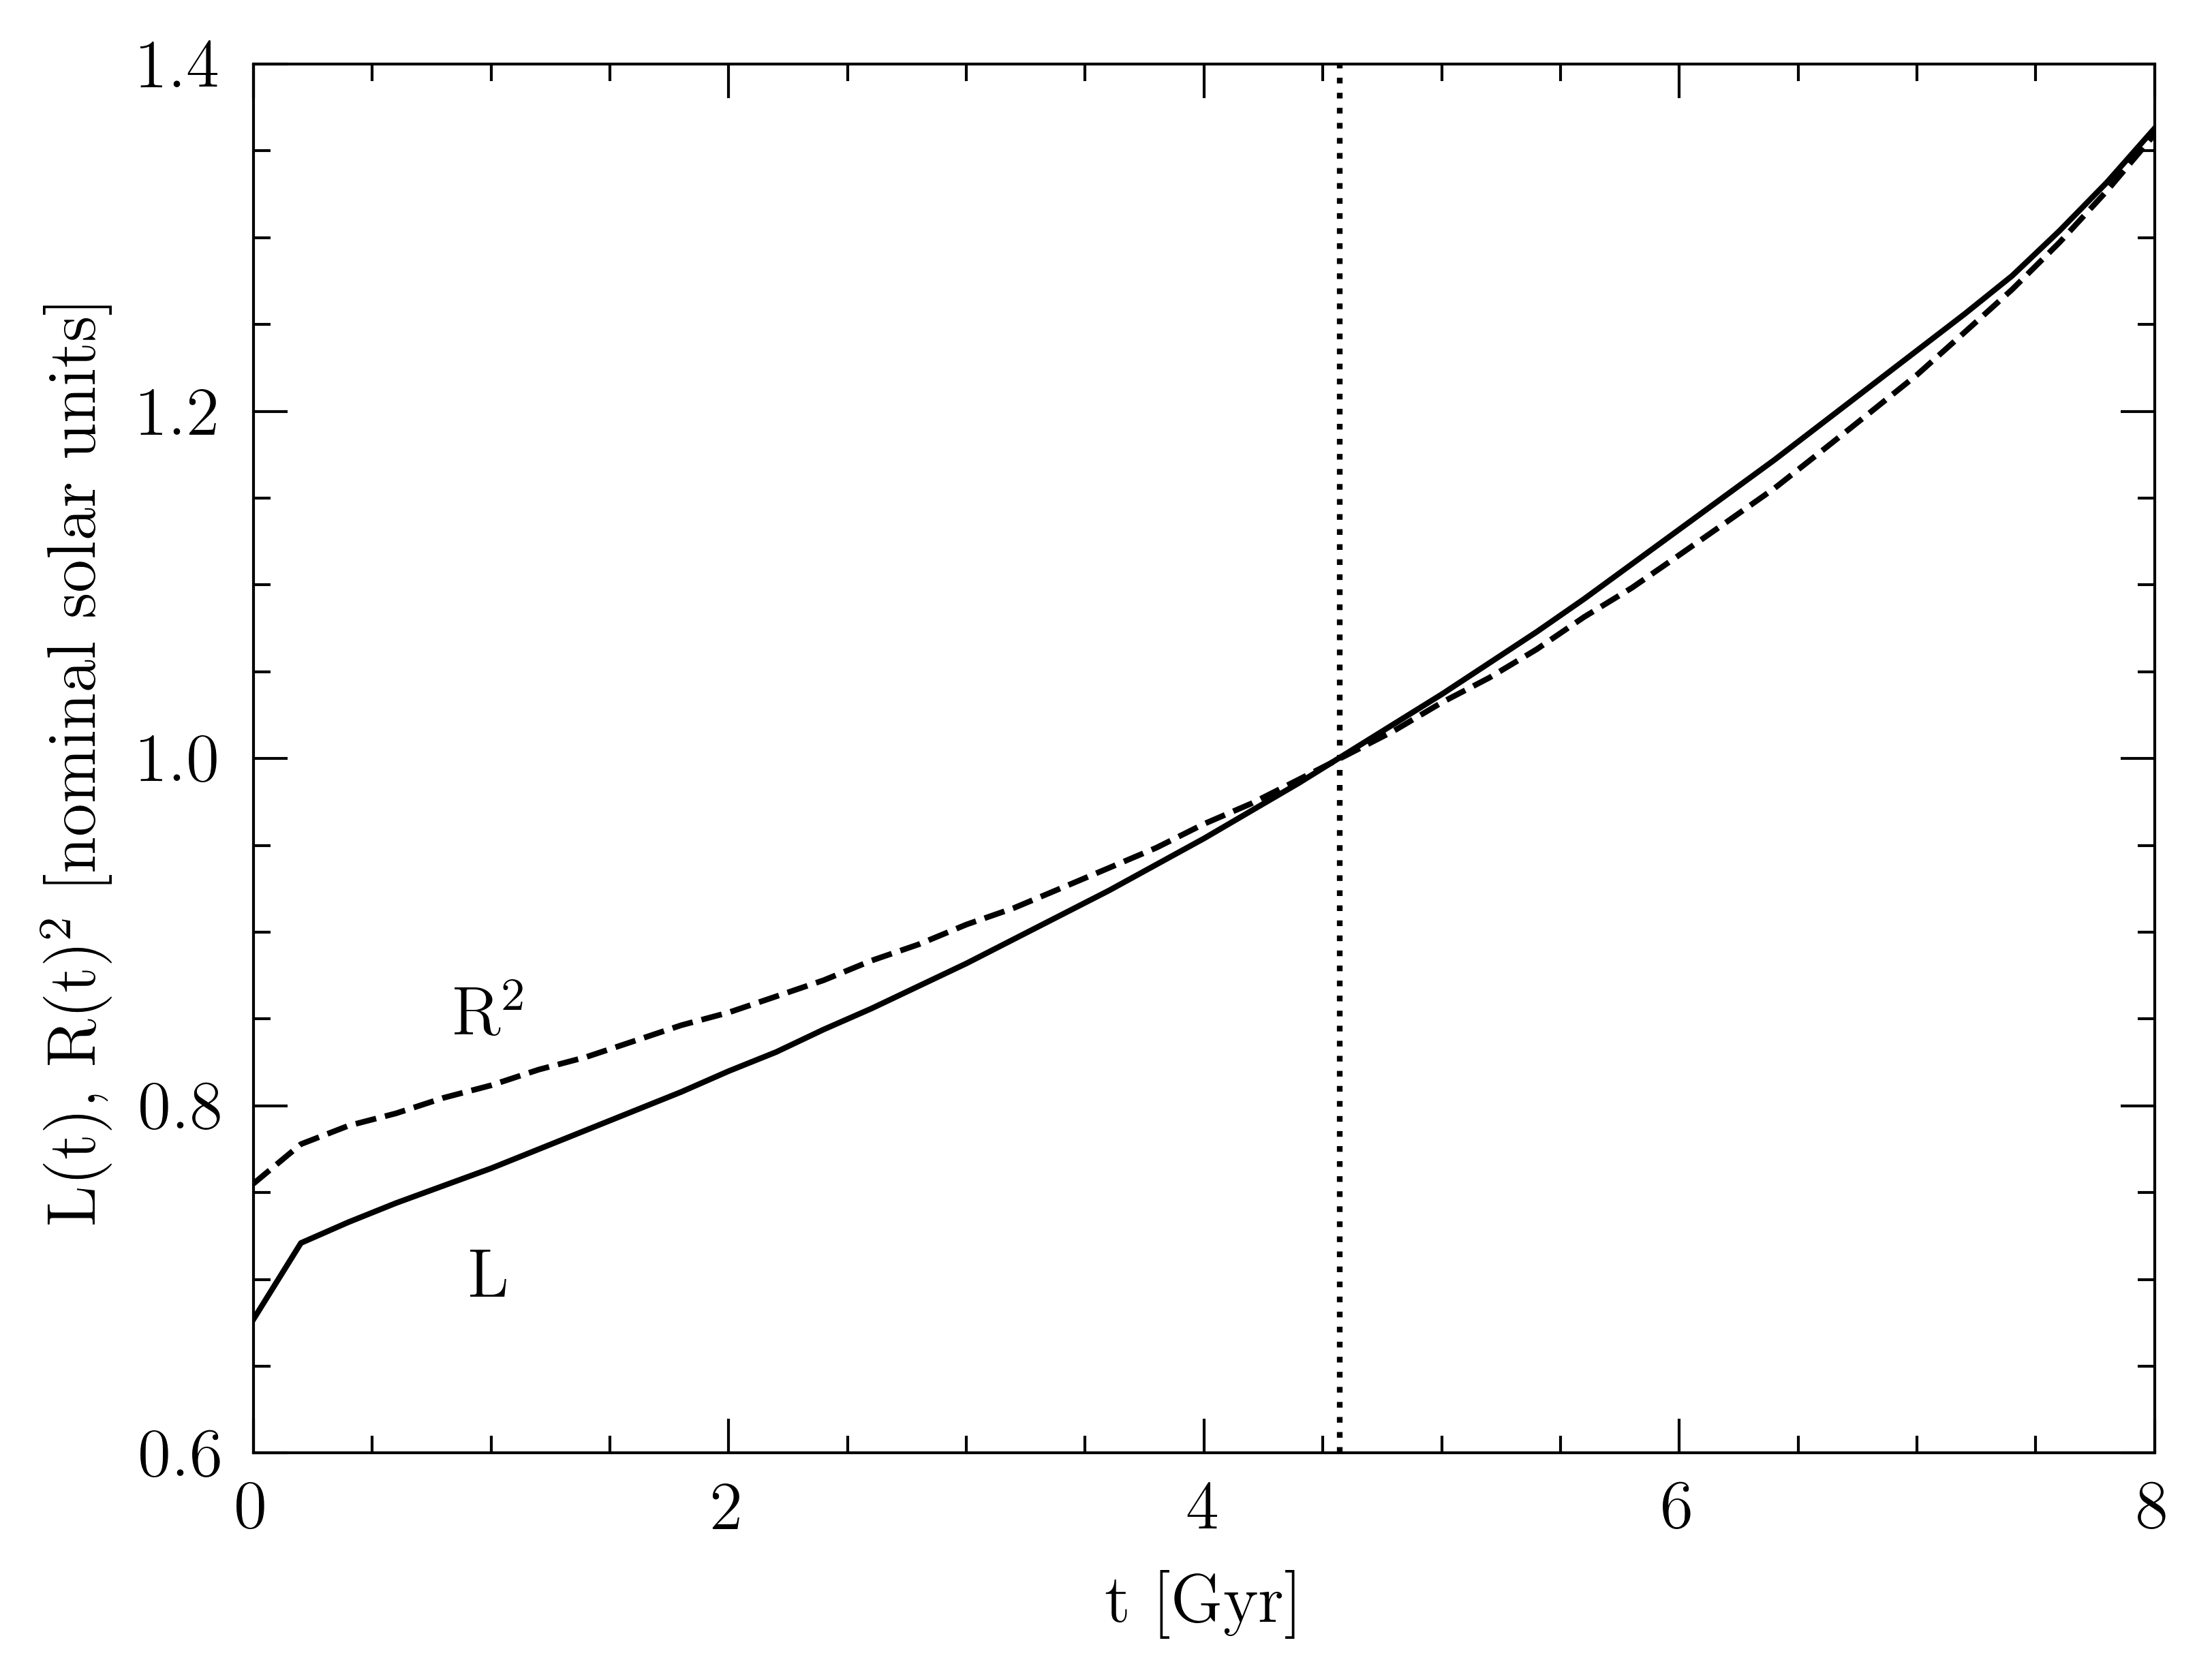

In [4]:
fig,ax = plt.subplots(figsize=(wInches,hInches),dpi=dpi)

ax.tick_params('both',length=6,width=lwidth,which='major',direction='in',top='on',right='on')
ax.tick_params('both',length=3,width=lwidth,which='minor',direction='in',top='on',right='on')
ax.set_xlim(tMin,tMax)
ax.set_xlabel(r't [Gyr]',fontsize=axisFontSize)
ax.xaxis.set_major_locator(MultipleLocator(2))
ax.xaxis.set_minor_locator(MultipleLocator(0.5))
ax.set_ylim(yMin,yMax)
ax.set_ylabel(r'L(t), R(t)$^2$ [nominal solar units]',fontsize=axisFontSize)
ax.yaxis.set_major_locator(MultipleLocator(0.2))
ax.yaxis.set_minor_locator(MultipleLocator(0.05))

# L(t) solid black line

ax.plot(tGyr,Lsun,'-',color='black',lw=1)

# R^2(t) - dashed black line

ax.plot(tGyr,R2sun,'--',color='black',lw=1)

# Present-day

ax.vlines(tSun,yMin,yMax,ls=[':'],color=['black'],lw=1)

# Labels

ax.text(1.0,0.7,'L',color='black',fontsize=axisFontSize,va='center',ha='center')
ax.text(1.0,0.85,r'R$^2$',color='black',fontsize=axisFontSize,va='center',ha='center')

# Make the plot

plt.plot()
plt.savefig(plotFile,bbox_inches='tight',facecolor='white')